# Task 0

## Problem 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as mp
import seaborn as sns; sns.set()
df_ge = pd.read_csv('GeneExpression_Baseline.csv')
df_ge.head()

,GeneID,Chr,Start,Stop,CodingLength,BaselineCell_1,BaselineCell_2,BaselineCell_3,BaselineCell_4,BaselineCell_5,...,BaselineCell_183,BaselineCell_184,BaselineCell_185,BaselineCell_186,BaselineCell_187,BaselineCell_188,BaselineCell_189,BaselineCell_190,BaselineCell_191,BaselineCell_192
0,DDX11L1,chr1,11874,14408,1651,61,47,72,77,75,...,39,34,28,25,30,29,92,26,43,33
1,WASH7P,chr1,14362,29370,1769,72,60,79,80,81,...,26,26,19,26,19,22,96,33,32,44
2,FAM138A,chr1,34611,36081,1130,159,182,152,133,147,...,59,64,44,51,47,54,145,57,65,59
3,FAM138F,chr1,34611,36081,1130,64,54,88,92,63,...,24,31,23,19,25,33,86,45,25,20
4,OR4F5,chr1,69091,70008,918,61,57,63,61,69,...,40,41,17,25,27,27,99,31,32,29


### we need multiple cells since if you look at the table and compare their cells, some different genes might by chance have same value for one cell(like cell 1 for first gene and 4th gene). But if we look at all cells instead,then the chance that they are all the same will be almost 0. So biologists need multiple cells to help them distinguish different genes with a higher accuracy.

## Problem 2

In [2]:
list_columns = list(df_ge.columns.values)
num_cells = 0
for i in list_columns:
    if i.startswith('BaselineCell'):
        num_cells += 1
print(str(num_cells) + " cells are sequenced")

192 cells are sequenced


## Problem 3

In [3]:
num_gene = df_ge['GeneID'].nunique()
print(str(num_gene) + " genes are sequenced")

23346 genes are sequenced


## Problem 4

Text(0.5,1,'distribution of genes in chromosomes')

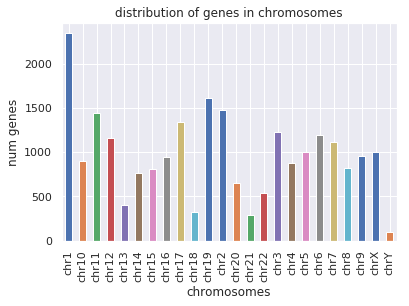

In [4]:
chromo = df_ge.groupby(['Chr']).size()
plot = chromo.plot.bar()
plot.set_xlabel('chromosomes')
plot.set_ylabel('num genes')
plot.set_title('distribution of genes in chromosomes') # set title

### According to the bar graph, the gene is not equally distributed.

## Problem 5

In [5]:
cod = df_ge.groupby(['CodingLength']).size()

Text(0.5,1,'probability distribution of coding length')

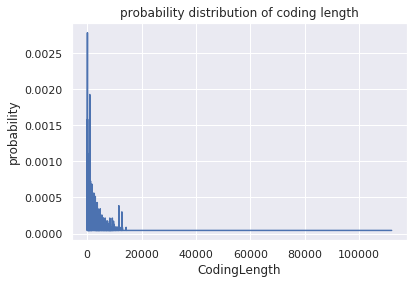

In [6]:
(cod / cod.sum()).plot()
mp.ylabel('probability')
mp.title('probability distribution of coding length')

# Task 1

## Problem 1

### a)

### Let E represents Temperature, T represents Time, V represents Viability, Quality represents Q
### P(Q,V,T,E) = P(Q|V,T,E)* P(V|TE)* P(T|E)* P(E)  (apply chain rule) = P(Q|VT)* P(V|TE)* P(T)* P(E) (by bayesian network)

### b)

### # of parameters for P(Q|V,T) = 2 * 2 = 4

### c)

In [7]:
df_qc= pd.read_csv('QualityControl.csv')
df_qc.head()

,temp,time,viab,qual
0,cool,short,high,good
1,hot,short,low,good
2,warm,short,high,good
3,cool,short,high,bad
4,cool,short,high,good


In [8]:
p_time = df_qc['time'].value_counts()/df_qc['time'].count()
p_time

short    0.9036
long     0.0964
Name: time, dtype: float64

In [9]:
p_temp = df_qc['temp'].value_counts()/df_qc['temp'].count()
p_temp

cool    0.4948
warm    0.3044
cold    0.1050
hot     0.0958
Name: temp, dtype: float64

In [10]:
## P(Viability | Temperature, Time)
p_vgiven = df_qc.groupby(['temp','time'])['viab'].apply(lambda g: g.value_counts()/len(g))
p_vgiven

temp  time       
cold  long   low     0.734694
             high    0.265306
      short  low     0.584034
             high    0.415966
cool  long   high    0.792829
             low     0.207171
      short  high    0.948268
             low     0.051732
hot   long   low     0.928571
             high    0.071429
      short  low     0.787185
             high    0.212815
warm  long   high    0.707143
             low     0.292857
      short  high    0.906657
             low     0.093343
Name: viab, dtype: float64

In [11]:
## P(Quality | Viability, Time)
p_qgiven = df_qc.groupby(['viab','time'])['qual'].apply(lambda g: g.value_counts()/len(g))
p_qgiven

viab  time       
high  long   good    0.522293
             bad     0.477707
      short  good    0.894852
             bad     0.105148
low   long   bad     0.952381
             good    0.047619
      short  good    0.517321
             bad     0.482679
Name: qual, dtype: float64

### d)

### Using bayes rules and chain rule, we can get:
### P(Q | E,T) = P(Q,E,T) / P(E,T)
### P(Q,E,T) = summation(all V) : P(Q | V,T) * P(V | E,T) * P(E) * p(T)
### P(E,T) = P(E) * P(T)
### by this formula, we apply it to all values of temperature and time

In [12]:
temp = df_qc['temp'].unique()
time = df_qc['time'].unique()
var = df_qc['viab'].unique()
qual = df_qc['qual'].unique()

In [13]:
for t in time:
    for e in temp:
        pqet = 0
        pet = p_time[t] * p_temp[e]
        for v in var:
            pqet += p_time[t] * p_temp[e] * p_vgiven[e,t][v] * p_qgiven[v,t]['good']
        print("for time: " + str(t) + " and temp: " + str(e) + " The probability that the quality is good is " + str(pqet/pet))
        print("for time: " + str(t) + " and temp: " + str(e) + " The probability that the quality is bad is " + str(1 - pqet/pet))

for time: short and temp: cool The probability that the quality is good is 0.8753217360140494
for time: short and temp: cool The probability that the quality is bad is 0.12467826398595061
for time: short and temp: hot The probability that the quality is good is 0.5976651674876158
for time: short and temp: hot The probability that the quality is bad is 0.4023348325123842
for time: short and temp: warm The probability that the quality is good is 0.8596122556171399
for time: short and temp: warm The probability that the quality is bad is 0.14038774438286006
for time: short and temp: cold The probability that the quality is good is 0.674361271818892
for time: short and temp: cold The probability that the quality is bad is 0.32563872818110795
for time: long and temp: cool The probability that the quality is good is 0.42395416816204995
for time: long and temp: cool The probability that the quality is bad is 0.57604583183795
for time: long and temp: hot The probability that the quality is goo

In [14]:
df_bib = pd.read_csv('BayesInferenceBase.csv')
df_bim = pd.read_csv('BayesInferenceMetf.csv')

### e)

### From 1.1d, we can find that as long as if time is long, then the quality is bad and if it's short then its quality is good, regardless of thier temp

In [15]:
bad_cell_b = df_bib[df_bib['time'] == 'long']['CellName']
bad_cell_b

184    BaselineCell_185
185    BaselineCell_186
186    BaselineCell_187
187    BaselineCell_188
188    BaselineCell_189
189    BaselineCell_190
190    BaselineCell_191
191    BaselineCell_192
Name: CellName, dtype: object

In [16]:
bad_cell_m = df_bim[df_bib['time'] == 'long']['CellName']
bad_cell_m

184    Metformin_185
185    Metformin_186
186    Metformin_187
187    Metformin_188
188    Metformin_189
189    Metformin_190
190    Metformin_191
191    Metformin_192
Name: CellName, dtype: object

### Bad cells are shown above

## Probelm2

### a)

In [17]:
df_gem = pd.read_csv('GeneExpression_Metformin.csv')

In [18]:
df_gem.drop(df_gem.columns[-9:],1,inplace= True)
df_ge.drop(df_ge.columns[-9:],1,inplace= True) # drop the last 8 cells, which are those bad cells

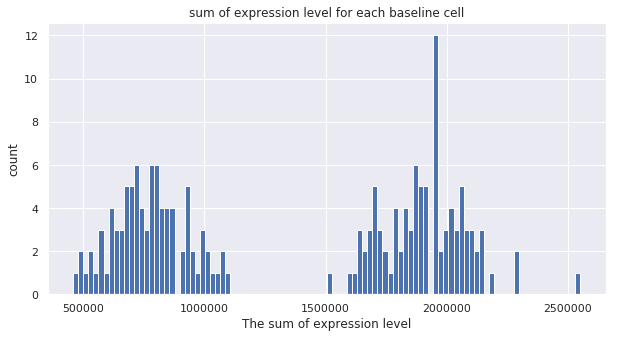

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10,5))
df_ge.sum()[5:].plot.hist(bins = 100)
plt.xlabel('The sum of expression level')
plt.ylabel('count')
plt.title('sum of expression level for each baseline cell')
plt.show()

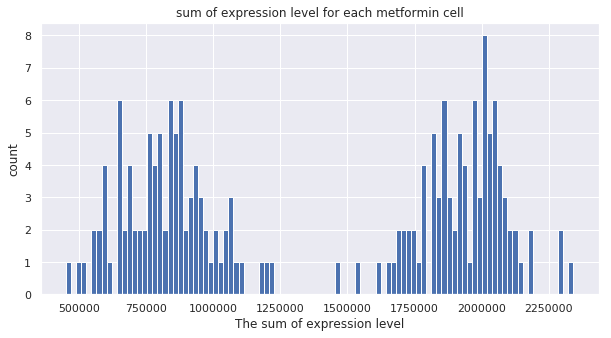

In [20]:
plt.figure(figsize= (10,5))
df_gem.sum()[5:].plot.hist(bins = 100)
plt.xlabel('The sum of expression level')
plt.ylabel('count')
plt.title('sum of expression level for each metformin cell')
plt.show()

### observation: the sum of expression level for both dataset follows a similar bimodal distribution, but the histogram of basline  has a longer tail, which means the data of it has a larger standard deviation

### b)

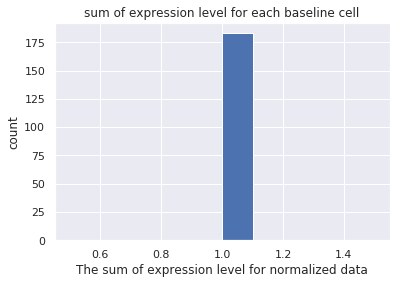

In [21]:
plt.figure()
df_ge_norm = df_ge[df_ge.columns[5:]].div(df_ge[df_ge.columns[5:]].sum(axis=0), axis=1)
round(df_ge_norm.sum()).hist()
plt.xlabel('The sum of expression level for normalized data')
plt.ylabel('count')
plt.title('sum of expression level for each baseline cell')
plt.show()

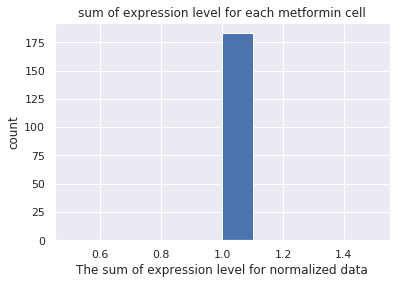

In [22]:
plt.figure()
df_gem_norm = df_gem[df_gem.columns[5:]].div(df_gem[df_gem.columns[5:]].sum(axis=0), axis=1)
plt.hist(x = round(df_gem_norm.sum()))
plt.xlabel('The sum of expression level for normalized data')
plt.ylabel('count')
plt.title('sum of expression level for each metformin cell')
plt.show()

### The histograms only have one bin, as expected

## Problem3

### a)

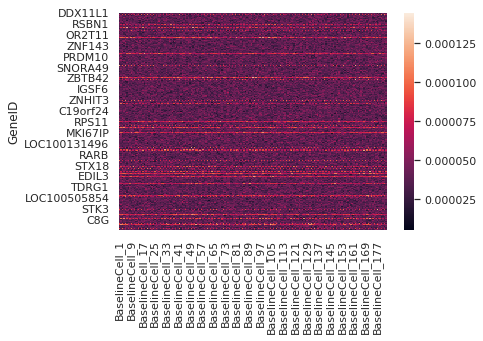

In [23]:
df_ge_norm.index = df_ge['GeneID']
ax = sns.heatmap(df_ge_norm)
figure = ax.get_figure()    
figure.savefig('p1.png', dpi=400)

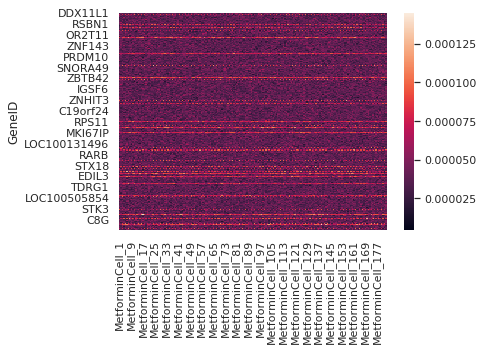

In [24]:
df_gem_norm.index =  df_gem['GeneID']
ax = sns.heatmap(df_gem_norm)
figure = ax.get_figure()    
figure.savefig('p2', dpi=400)

### I only include a sample of genes and cells to save time. From the plot, we can see that these two plots are very similar to each other, which means the normalized values of these two data set are pretty close

### b)

/home/wan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of 3 selected cells in baseline')

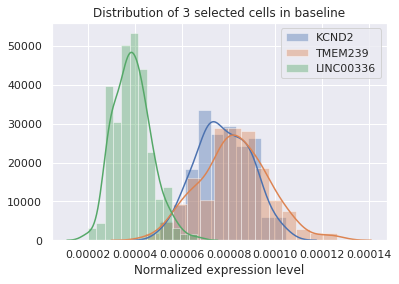

In [25]:
sns.distplot(df_ge_norm.iloc[(df_ge[df_ge['GeneID'] == 'KCND2'].index[0])], kde=True,label='KCND2');
sns.distplot(df_ge_norm.iloc[(df_ge[df_ge['GeneID'] == 'TMEM239'].index[0])], kde=True, label='TMEM239');
sns.distplot(df_ge_norm.iloc[(df_ge[df_ge['GeneID'] == 'LINC00336'].index[0])], kde=True, label='LINC00336');
plt.legend()
plt.xlabel('Normalized expression level')
plt.title('Distribution of 3 selected cells in baseline')

Text(0.5,1,'Distribution of 3 selected cells in metformin')

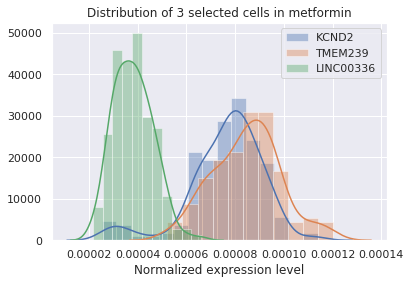

In [26]:
sns.distplot(df_gem_norm.iloc[(df_gem[df_gem['GeneID'] == 'KCND2'].index[0])], kde=True, label='KCND2');
sns.distplot(df_gem_norm.iloc[(df_gem[df_gem['GeneID'] == 'TMEM239'].index[0])], kde=True, label='TMEM239');
sns.distplot(df_gem_norm.iloc[(df_gem[df_gem['GeneID'] == 'LINC00336'].index[0])], kde=True, label='LINC00336');
plt.legend()
plt.xlabel('Normalized expression level')
plt.title('Distribution of 3 selected cells in metformin')

### c)

### Though coming from two different datasets, the distribution of these three genes in two different data set are very similar

Text(0.5,1,'four selected cells distribution')

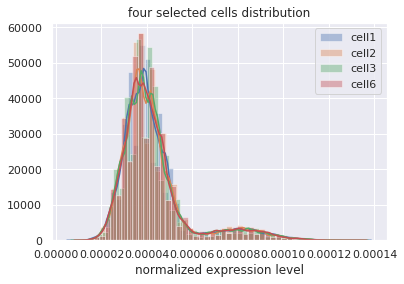

In [27]:
sns.distplot(df_ge_norm['BaselineCell_1'], kde=True, label='cell1');
sns.distplot(df_ge_norm['BaselineCell_2'], kde=True, label='cell2');
sns.distplot(df_gem_norm['MetforminCell_3'], kde=True,label='cell3');
sns.distplot(df_gem_norm['MetforminCell_6'], kde=True,label='cell6');
plt.legend()
plt.xlabel('normalized expression level')
plt.title('four selected cells distribution')


### The distribution follows very closely to Gaussian distribution, with a small noise at the end of right tail

## Task2

## Problem1

### a)

### It is a non-parametric test and we use them when we can not make an assumation(have no prior information) abot the distribution of data

### b)

In [28]:
from scipy import stats
ps = []
for i in range(len(df_ge_norm)):
    ps.append(stats.ks_2samp(df_ge_norm.iloc[i],df_gem_norm.iloc[i])[1])
ps = np.array(ps)

### c)

### The use of two-sample ks test is to test whether two data come from the same distribution. Specifically, if gene is KCND2, the null hypothesis is that the data from baseline and the data from merformin follows the same distribution

### d)

In [29]:
dic = {}
alpha = [0.1,0.05,0.01,0.005,0.001]
for a in alpha:
    dic[a] = np.sum(ps <= a)
df_p_true = pd.DataFrame(dic,index = ['observed # of significant data'])
df_p_true

,0.1,0.05,0.01,0.005,0.001
observed # of significant data,2257,1342,319,160,40


## Problem2

### )a

### 0.05 p value means that given baseline and metformin follows the same distribution, the probability that we would observe data like our data or more extreme(data that follows a more different distribution) is 0.05

### )b

### If null hypothesis is true, the p value would follow a uniform distribution under the interval [0,1]

### )c

In [30]:
# Based on b we know that p would follow a uniform distribution if gene's expression was not altered
dic = {}
for a in alpha:
    dic[a] = a * len(df_gem_norm)
df_p_exp = pd.DataFrame(dic,index = ['expected # of significant data'])
print(pd.concat([df_p_exp,df_p_true]))

                                 0.100   0.050   0.010   0.005   0.001
expected # of significant data  2334.6  1167.3  233.46  116.73  23.346
observed # of significant data  2257.0  1342.0  319.00  160.00  40.000


### )d

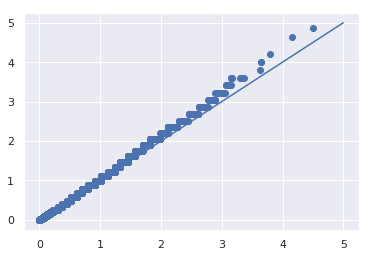

In [31]:
p_exp = np.sort(-np.log10(np.random.uniform(0,1,len(df_gem_norm))))
ps_log = np.sort(-np.log10(ps))
plt.scatter(x=p_exp,y = ps_log)
plt.plot(range(int(max((ps_log))) + 2),range(int(max(ps_log)) + 2))

### )e

### (1)By taking the negative log for each data, we can transform the tail of data in a more readable way(the range is too small but the amounts of data is large) without changing the relationship of them. if we do not take the log, the data would be clustered together and it's hard for us to spot any interesting patterns for the tail

### (2)Since the Q-Q plot approximately aligns with the x = y line, the observed p values behaves closely to expected p value under the assumption that the null is true; thus, the null hypothesis is concluded to be true; that is,  the gene's expression in baseline and in merformin follows the same distribution.

[0.88167215 0.47186251]
[11.60557132 11.60548128]


12

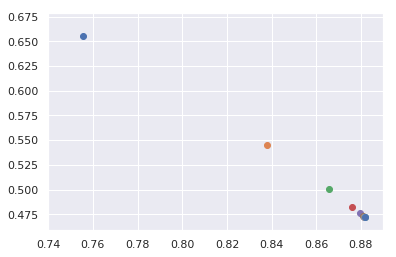

In [46]:
x = np.array([[10,3],
             [3,6]])
x_old = np.array([3,5])
x_new = x@x_old
x_new = x_new / np.linalg.norm(x_new)
count = 1
while(True):
    if(np.linalg.norm(x_new - x_old) < 1e-5):
        print(x_new)
        print(x@x_new / x_new)
        break
    plt.scatter(x = x_new[0],y = x_new[1])
    count += 1
    x_old = x_new 
    x_new = x@x_old
    x_new = x_new / np.linalg.norm(x_new)

count

In [39]:
np.linalg.eig(x)

(array([11.60555128,  4.39444872]), array([[ 0.8816746 , -0.47185793],
        [ 0.47185793,  0.8816746 ]]))